In [2]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
data_dir = "../../data_dir"

In [4]:
# loading class DataFrames
Nsaba.aba_load(data_dir)
Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [5]:
df = geneinfo.load_gene_file("../../")

In [114]:
# Intializing instance and loading gene expression
tsaba = Nsaba()
tsaba.load_ge_pickle(path=data_dir)

'ge' dictionary successfully loaded


In [7]:
term = 'reward'
tsaba.is_term(term)

True

In [115]:
tsaba.estimate_aba_ge([6531])

In [189]:
%%time
tsaba.estimate_ns_act(term, knn_args={"n_neighbors":10})

CPU times: user 1.93 s, sys: 190 ms, total: 2.12 s
Wall time: 2.18 s


In [190]:
analy = analysis.NsabaAnalysis(tsaba)

To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled


t-value: -4.1803 
p-value: 3.199E-05
Effect size: -0.4658
Control/Functional Split: 803/90



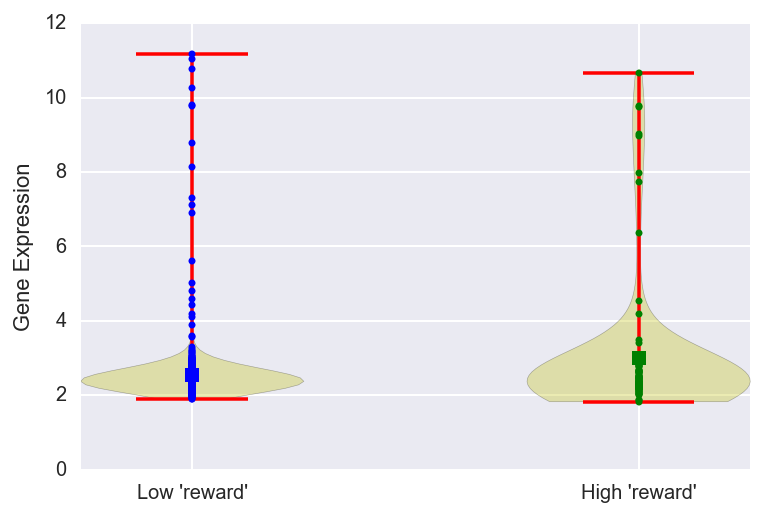

In [191]:
analy.term_ge_ttest(term, 6531, split_method='quant', graphops='violin', quant=90)

In [192]:
ttest_metr = analy.term_ge_ttest_multi(term, quant=90)

This may take a couple of minutes ...


In [193]:
fetch = False
if fetch:
    eids = geneinfo.fetch_entrez_ids("reward", 5)
    eids = [int(eid) for eid in eids]

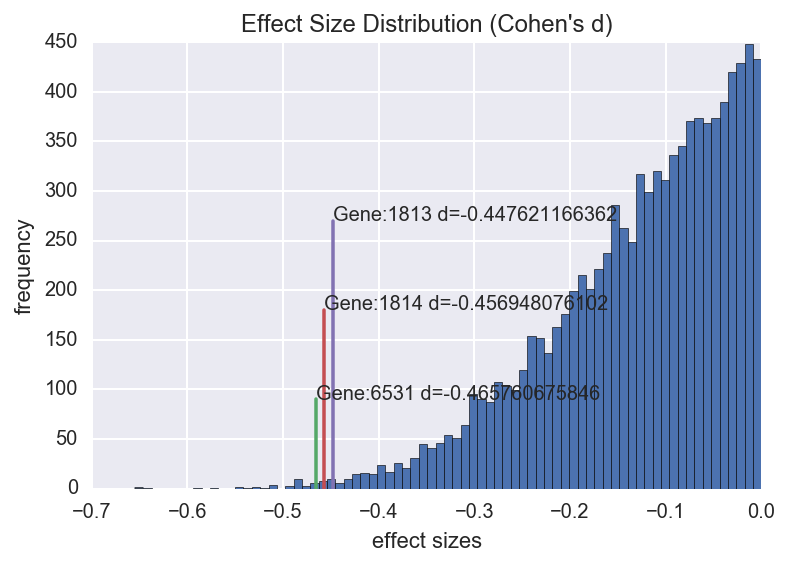

In [194]:
analy.cohen_d_distr(ttest_metr, genes_of_interest=eids)

Percent Significant (Bonferroni Correction; alpha = .05): 0.034 %


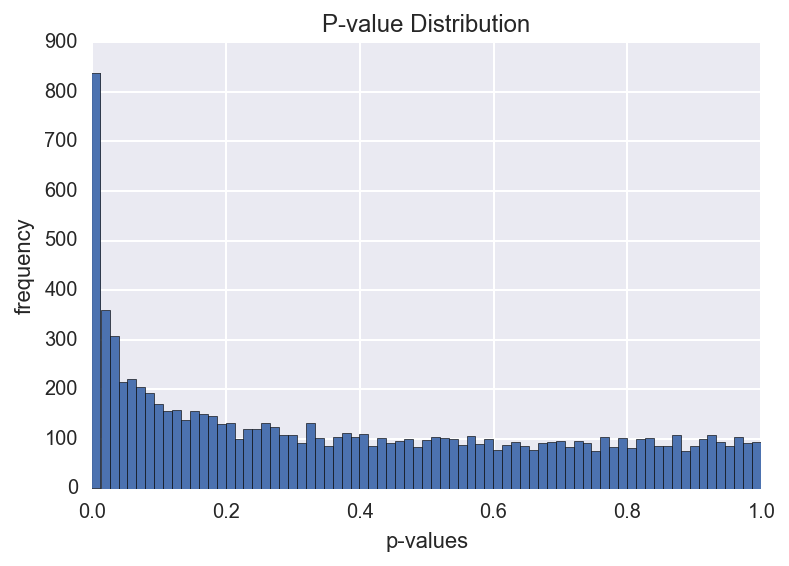

In [196]:
analy.p_val_distr(ttest_metr)

In [197]:
analy.fetch_gene_descriptions(ttest_metr, csv_path="../../", nih_fetch_num=40)

Gene 100008589 not found in NIH database
Gene 353134 not found in NIH database
Gene 56886 not found in NIH database
Gene 54874 not found in NIH database
Gene 441052 not found in NIH database
Gene 27233 not found in NIH database
Gene 283521 not found in NIH database
Gene 25890 not found in NIH database
Gene 128414 not found in NIH database
Gene 84062 not found in NIH database
Gene 140828 not found in NIH database
Gene 253970 not found in NIH database
Gene 93556 not found in NIH database
Gene 23620 not found in NIH database
Gene 83604 not found in NIH database
Gene 114885 not found in NIH database
Gene 645090 not found in NIH database
Gene 100133211 not found in NIH database
Gene 150378 not found in NIH database
Gene 140733 not found in NIH database
Gene 374462 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


6295 (p = 3.601E-07; d = -0.573): [u'Members of arrestin/beta-arrestin protein family are thought to participate in agonist-mediated desensitization of G-protein-c

[(6295,
  -0.57284595443034836,
  3.6007814381785083e-07,
  'S-antigen; retina and pineal gland (arrestin)',
  "[u'Members of arrestin/beta-arrestin protein family are thought to participate in agonist-mediated desensitization of G-protein-coupled receptors and cause specific dampening of cellular responses to stimuli such as hormones, neurotransmitters, or sensory signals. S-arrestin, also known as S-antigen, is a major soluble photoreceptor protein that is involved in desensitization of the photoactivated transduction cascade. It is expressed in the retina and the pineal gland and inhibits coupling of rhodopsin to transducin in vitro. Additionally, S-arrestin is highly antigenic, and is capable of inducing experimental autoimmune uveoretinitis. Mutations in this gene have been associated with Oguchi disease, a rare autosomal recessive form of night blindness. [provided by RefSeq, Jul 2008]']"),
 (341,
  -0.54428555098755427,
  1.1962864886694432e-06,
  'apolipoprotein C-I',
  "[u'The

In [198]:
r_vals = analy.term_ge_spearman_rho(term)

This may take a couple of minutes ...


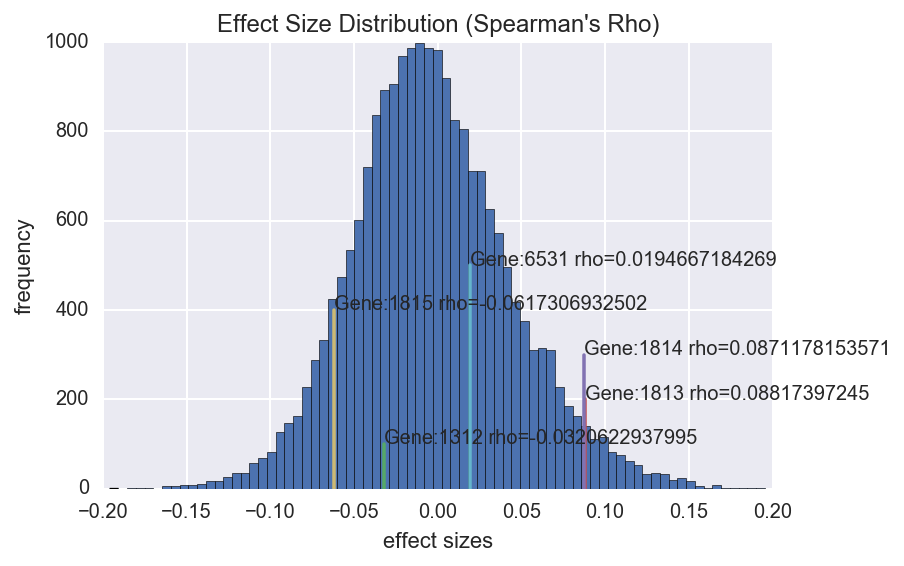

In [199]:
analy.rho_distr(r_vals, genes_of_interest=eids)

In [200]:
analy.fetch_gene_descriptions(r_vals, coeff='spearman', csv_path="../..")

Gene 20171 not found in NIH database
Gene 20253 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


9929 (r = 0.181): Josephin domain containing 1
 No description found


1742 (r = 0.176): discs, large homolog 4 (Drosophila)
 [u'This gene encodes a member of the membrane-associated guanylate kinase (MAGUK) family. It heteromultimerizes with another MAGUK protein, DLG2, and is recruited into NMDA receptor and potassium channel clusters. These two MAGUK proteins may interact at postsynaptic sites to form a multimeric scaffold for the clustering of receptors, ion channels, and associated signaling proteins. Multiple transcript variants encoding different isoforms have been found for this gene. [provided by RefSeq, Jul 2008]']


2822 (r = 0.166): glycosylphosphatidylinositol specific phospholipase D1
 [u'Many proteins are tethered to the extracellular face of eukaryotic plasma membranes by a glycosylphosphatidylinositol (GPI) anchor. The GPI-anchor is a glycolipid found on m

[(9929,
  0.18143710297735294,
  'Josephin domain containing 1',
  'No description found'),
 (1742,
  0.17627655005560525,
  'discs, large homolog 4 (Drosophila)',
  "[u'This gene encodes a member of the membrane-associated guanylate kinase (MAGUK) family. It heteromultimerizes with another MAGUK protein, DLG2, and is recruited into NMDA receptor and potassium channel clusters. These two MAGUK proteins may interact at postsynaptic sites to form a multimeric scaffold for the clustering of receptors, ion channels, and associated signaling proteins. Multiple transcript variants encoding different isoforms have been found for this gene. [provided by RefSeq, Jul 2008]']"),
 (2822,
  0.16627032817877038,
  'glycosylphosphatidylinositol specific phospholipase D1',
  "[u'Many proteins are tethered to the extracellular face of eukaryotic plasma membranes by a glycosylphosphatidylinositol (GPI) anchor. The GPI-anchor is a glycolipid found on many blood cells. The protein encoded by this gene is 